In [2]:
import numpy as np 
from matplotlib import pyplot as plt
import os
from os import path
import h5py

93, ['snap_0.h5', 'snap_1.h5', 'snap_2.h5', 'snap_3.h5', 'snap_4.h5', 'snap_5.h5', 'snap_6.h5', 'snap_7.h5', 'snap_8.h5', 'snap_9.h5', 'snap_10.h5', 'snap_11.h5', 'snap_12.h5', 'snap_13.h5', 'snap_14.h5', 'snap_15.h5', 'snap_16.h5', 'snap_17.h5', 'snap_18.h5', 'snap_19.h5', 'snap_20.h5', 'snap_21.h5', 'snap_22.h5', 'snap_23.h5', 'snap_24.h5', 'snap_25.h5', 'snap_26.h5', 'snap_27.h5', 'snap_28.h5', 'snap_29.h5', 'snap_30.h5', 'snap_31.h5', 'snap_32.h5', 'snap_33.h5', 'snap_34.h5', 'snap_35.h5', 'snap_36.h5', 'snap_37.h5', 'snap_38.h5', 'snap_39.h5', 'snap_40.h5', 'snap_41.h5', 'snap_42.h5', 'snap_43.h5', 'snap_44.h5', 'snap_45.h5', 'snap_46.h5', 'snap_47.h5', 'snap_48.h5', 'snap_49.h5', 'snap_50.h5', 'snap_51.h5', 'snap_52.h5', 'snap_53.h5', 'snap_54.h5', 'snap_55.h5', 'snap_56.h5', 'snap_57.h5', 'snap_58.h5', 'snap_59.h5', 'snap_60.h5', 'snap_61.h5', 'snap_62.h5', 'snap_63.h5', 'snap_64.h5', 'snap_65.h5', 'snap_66.h5', 'snap_67.h5', 'snap_68.h5', 'snap_69.h5', 'snap_70.h5', 'snap_71.h5

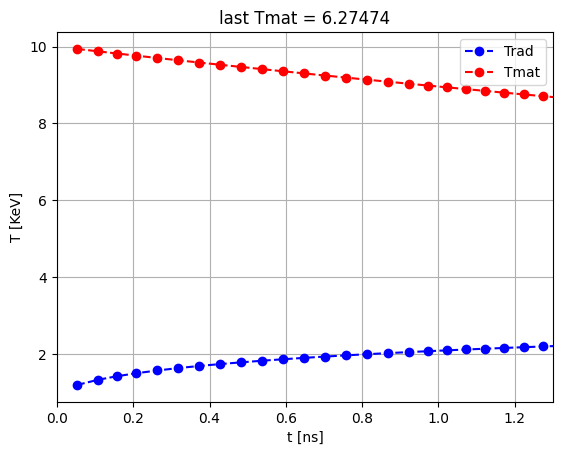

In [7]:
output_files_path = "/home/itamarg/workspace/RICH/output/equilibration"
path_to_initial_snap = path.join(output_files_path, f"snap_{0}.h5")

snaps = [file for file in os.listdir(output_files_path) if file.endswith(".h5") and file.startswith("snap")]
print(len(snaps), snaps, sep=', ')

num_of_snaps = len(snaps)
num_cells = None
num_groups = None

with h5py.File(path_to_initial_snap) as h5_file:
    print(h5_file.keys())
    num_cells = len(np.array(h5_file["Temperature"]))
    num_groups = len([key for key in h5_file.keys() if "Eg" in key])

assert num_cells == 1

print("num_cells: ", num_cells)
print("num_groups: ", num_groups)

speed_of_light = 2.99792458e10
stefan_boltzman = 5.670374e-5
radiation_constant = 4 * stefan_boltzman / speed_of_light
boltzmann_constant = 1.380649e-16

ev = 1.602176634e-12
kev = 1e3*ev

kev_to_kelvin = kev / boltzmann_constant

Erad = np.ndarray(shape=num_of_snaps)
Trad = np.ndarray(shape=num_of_snaps)
Tmat = np.ndarray(shape=num_of_snaps)
time = np.ndarray(shape=num_of_snaps)

for i in range(num_of_snaps):
    path_to_snap =  path.join(output_files_path, snaps[i])
    with h5py.File(path_to_snap) as h5_file:
        Tmat[i] = h5_file["Temperature"][0]
        Erad[i] = h5_file["Erad"][0]
        Trad[i] = (Erad[i] / radiation_constant)**0.25
        time[i] = h5_file["Time"][0]

plt.plot(time/1e-9, Trad/kev_to_kelvin, '--ob', label="Trad")
plt.plot(time/1e-9, Tmat/kev_to_kelvin, '--or', label="Tmat")
plt.grid()
plt.xlabel("t [ns]")
plt.ylabel("T [KeV]")
plt.legend(loc="best")
plt.title(f"last Tmat = {Tmat[-1]/kev_to_kelvin:g}")
plt.xlim(0.0, 1.3)
plt.show()
plt.close()

128, ['snap_0.h5', 'snap_1.h5', 'snap_2.h5', 'snap_3.h5', 'snap_4.h5', 'snap_5.h5', 'snap_6.h5', 'snap_7.h5', 'snap_8.h5', 'snap_9.h5', 'snap_10.h5', 'snap_11.h5', 'snap_12.h5', 'snap_13.h5', 'snap_14.h5', 'snap_15.h5', 'snap_16.h5', 'snap_17.h5', 'snap_18.h5', 'snap_19.h5', 'snap_20.h5', 'snap_21.h5', 'snap_22.h5', 'snap_23.h5', 'snap_24.h5', 'snap_25.h5', 'snap_26.h5', 'snap_27.h5', 'snap_28.h5', 'snap_29.h5', 'snap_30.h5', 'snap_31.h5', 'snap_32.h5', 'snap_33.h5', 'snap_34.h5', 'snap_35.h5', 'snap_36.h5', 'snap_37.h5', 'snap_38.h5', 'snap_39.h5', 'snap_40.h5', 'snap_41.h5', 'snap_42.h5', 'snap_43.h5', 'snap_44.h5', 'snap_45.h5', 'snap_46.h5', 'snap_47.h5', 'snap_48.h5', 'snap_49.h5', 'snap_50.h5', 'snap_51.h5', 'snap_52.h5', 'snap_53.h5', 'snap_54.h5', 'snap_55.h5', 'snap_56.h5', 'snap_57.h5', 'snap_58.h5', 'snap_59.h5', 'snap_60.h5', 'snap_61.h5', 'snap_62.h5', 'snap_63.h5', 'snap_64.h5', 'snap_65.h5', 'snap_66.h5', 'snap_67.h5', 'snap_68.h5', 'snap_69.h5', 'snap_70.h5', 'snap_71.h

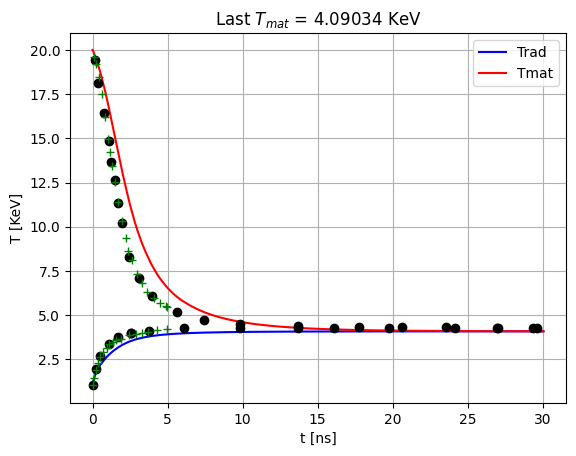

In [13]:
output_files_path = "/home/itamarg/workspace/RICH/output/equilibration_compton"
path_to_initial_snap = path.join(output_files_path, f"snap_{0}.h5")

snaps = [file for file in os.listdir(output_files_path) if file.endswith(".h5") and file.startswith("snap")]
print(len(snaps), snaps, sep=', ')

num_of_snaps = len(snaps)
num_cells = None
num_groups = None

with h5py.File(path_to_initial_snap) as h5_file:
    print(h5_file.keys())
    num_cells = len(np.array(h5_file["Temperature"]))
    num_groups = len([key for key in h5_file.keys() if "Eg" in key])

assert num_cells == 1

print("num_cells: ", num_cells)
print("num_groups: ", num_groups)

speed_of_light = 2.99792458e10
stefan_boltzman = 5.670374e-5
radiation_constant = 4 * stefan_boltzman / speed_of_light
boltzmann_constant = 1.380649e-16

ev = 1.602176634e-12
kev = 1e3*ev

kev_to_kelvin = kev / boltzmann_constant

Erad = np.ndarray(shape=num_of_snaps)
Trad = np.ndarray(shape=num_of_snaps)
Tmat = np.ndarray(shape=num_of_snaps)
time = np.ndarray(shape=num_of_snaps)

for i in range(num_of_snaps):
    path_to_snap =  path.join(output_files_path, snaps[i])
    with h5py.File(path_to_snap) as h5_file:
        Tmat[i] = h5_file["Temperature"][0]
        Erad[i] = h5_file["Erad"][0]
        Trad[i] = (Erad[i] / radiation_constant)**0.25
        time[i] = h5_file["Time"][0]

plt.plot(time/1e-9, Trad/kev_to_kelvin, '-b', label="Trad")
plt.plot(time/1e-9, Tmat/kev_to_kelvin, '-r', label="Tmat")
plt.grid()
plt.xlabel("t [ns]")
plt.ylabel("T [KeV]")
plt.legend(loc="best")
plt.title(f"Last $T_{{mat}}$ = {Tmat[-1]/kev_to_kelvin:g} KeV")
Trad_sample = np.loadtxt(path.join("../../CMMC/data", "Till_winslow_Trad.txt"), delimiter=",")
Tmat_sample = np.loadtxt(path.join("../../CMMC/data", "Till_winslow_Tmat.txt"), delimiter=",")
Trad_sample_winslow = np.loadtxt(path.join("../../CMMC/data", "Winslow_Trad.txt"), delimiter=",")
Tmat_sample_winslow = np.loadtxt(path.join("../../CMMC/data", "Winslow_Tmat.txt"), delimiter=",")
plt.plot(Trad_sample[:,0]/1e-9, Trad_sample[:,1], "o", c='k', label="Till Trad")
plt.plot(Tmat_sample[:,0]/1e-9, Tmat_sample[:,1], "o", c='k', label="Till Tmat")
plt.plot(Tmat_sample_winslow[:,0]/1e-9, Tmat_sample_winslow[:,1], "+", c='g', label="Winslow Tmat")
plt.plot(Trad_sample_winslow[:,0]/1e-9, Trad_sample_winslow[:,1], "+", c='g', label="Winslow Trad")
# plt.xscale("symlog")
plt.show()
plt.close()

130, ['snap_0.h5', 'snap_1.h5', 'snap_2.h5', 'snap_3.h5', 'snap_4.h5', 'snap_5.h5', 'snap_6.h5', 'snap_7.h5', 'snap_8.h5', 'snap_9.h5', 'snap_10.h5', 'snap_11.h5', 'snap_12.h5', 'snap_13.h5', 'snap_14.h5', 'snap_15.h5', 'snap_16.h5', 'snap_17.h5', 'snap_18.h5', 'snap_19.h5', 'snap_20.h5', 'snap_21.h5', 'snap_22.h5', 'snap_23.h5', 'snap_24.h5', 'snap_25.h5', 'snap_26.h5', 'snap_27.h5', 'snap_28.h5', 'snap_29.h5', 'snap_30.h5', 'snap_31.h5', 'snap_32.h5', 'snap_33.h5', 'snap_34.h5', 'snap_35.h5', 'snap_36.h5', 'snap_37.h5', 'snap_38.h5', 'snap_39.h5', 'snap_40.h5', 'snap_41.h5', 'snap_42.h5', 'snap_43.h5', 'snap_44.h5', 'snap_45.h5', 'snap_46.h5', 'snap_47.h5', 'snap_48.h5', 'snap_49.h5', 'snap_50.h5', 'snap_51.h5', 'snap_52.h5', 'snap_53.h5', 'snap_54.h5', 'snap_55.h5', 'snap_56.h5', 'snap_57.h5', 'snap_58.h5', 'snap_59.h5', 'snap_60.h5', 'snap_61.h5', 'snap_62.h5', 'snap_63.h5', 'snap_64.h5', 'snap_65.h5', 'snap_66.h5', 'snap_67.h5', 'snap_68.h5', 'snap_69.h5', 'snap_70.h5', 'snap_71.h

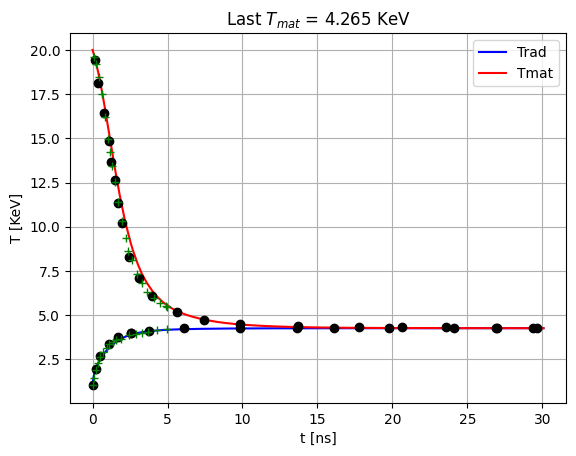

In [24]:
output_files_path = "/home/itamarg/workspace/RICH/output/Winslow"
path_to_initial_snap = path.join(output_files_path, f"snap_{0}.h5")

snaps = [file for file in os.listdir(output_files_path) if file.endswith(".h5") and file.startswith("snap")]
print(len(snaps), snaps, sep=', ')

num_of_snaps = len(snaps)
num_cells = None
num_groups = None

with h5py.File(path_to_initial_snap) as h5_file:
    print(h5_file.keys())
    num_cells = len(np.array(h5_file["Temperature"]))
    num_groups = len([key for key in h5_file.keys() if "Eg" in key])

assert num_cells == 1

print("num_cells: ", num_cells)
print("num_groups: ", num_groups)

speed_of_light = 2.99792458e10
stefan_boltzman = 5.670374e-5
radiation_constant = 4 * stefan_boltzman / speed_of_light
boltzmann_constant = 1.380649e-16

ev = 1.602176634e-12
kev = 1e3*ev

kev_to_kelvin = kev / boltzmann_constant

Erad = np.ndarray(shape=num_of_snaps)
Trad = np.ndarray(shape=num_of_snaps)
Tmat = np.ndarray(shape=num_of_snaps)
time = np.ndarray(shape=num_of_snaps)

for i in range(num_of_snaps):
    path_to_snap =  path.join(output_files_path, snaps[i])
    with h5py.File(path_to_snap) as h5_file:
        Tmat[i] = h5_file["Temperature"][0]
        Erad[i] = h5_file["Erad"][0]
        Trad[i] = (Erad[i] / radiation_constant)**0.25
        time[i] = h5_file["Time"][0]

plt.plot(time/1e-9, Trad/kev_to_kelvin, '-b', label="Trad")
plt.plot(time/1e-9, Tmat/kev_to_kelvin, '-r', label="Tmat")
plt.grid()
plt.xlabel("t [ns]")
plt.ylabel("T [KeV]")
plt.legend(loc="best")
plt.title(f"Last $T_{{mat}}$ = {Tmat[-1]/kev_to_kelvin:g} KeV")
Trad_sample = np.loadtxt(path.join("../../CMMC/data", "Till_winslow_Trad.txt"), delimiter=",")
Tmat_sample = np.loadtxt(path.join("../../CMMC/data", "Till_winslow_Tmat.txt"), delimiter=",")
Trad_sample_winslow = np.loadtxt(path.join("../../CMMC/data", "Winslow_Trad.txt"), delimiter=",")
Tmat_sample_winslow = np.loadtxt(path.join("../../CMMC/data", "Winslow_Tmat.txt"), delimiter=",")
plt.plot(Trad_sample[:,0]/1e-9, Trad_sample[:,1], "o", c='k', label="Till Trad")
plt.plot(Tmat_sample[:,0]/1e-9, Tmat_sample[:,1], "o", c='k', label="Till Tmat")
plt.plot(Tmat_sample_winslow[:,0]/1e-9, Tmat_sample_winslow[:,1], "+", c='g', label="Winslow Tmat")
plt.plot(Trad_sample_winslow[:,0]/1e-9, Trad_sample_winslow[:,1], "+", c='g', label="Winslow Trad")
# plt.xscale("symlog")
plt.show()
plt.close()

127, ['snap_0.h5', 'snap_1.h5', 'snap_2.h5', 'snap_3.h5', 'snap_4.h5', 'snap_5.h5', 'snap_6.h5', 'snap_7.h5', 'snap_8.h5', 'snap_9.h5', 'snap_10.h5', 'snap_11.h5', 'snap_12.h5', 'snap_13.h5', 'snap_14.h5', 'snap_15.h5', 'snap_16.h5', 'snap_17.h5', 'snap_18.h5', 'snap_19.h5', 'snap_20.h5', 'snap_21.h5', 'snap_22.h5', 'snap_23.h5', 'snap_24.h5', 'snap_25.h5', 'snap_26.h5', 'snap_27.h5', 'snap_28.h5', 'snap_29.h5', 'snap_30.h5', 'snap_31.h5', 'snap_32.h5', 'snap_33.h5', 'snap_34.h5', 'snap_35.h5', 'snap_36.h5', 'snap_37.h5', 'snap_38.h5', 'snap_39.h5', 'snap_40.h5', 'snap_41.h5', 'snap_42.h5', 'snap_43.h5', 'snap_44.h5', 'snap_45.h5', 'snap_46.h5', 'snap_47.h5', 'snap_48.h5', 'snap_49.h5', 'snap_50.h5', 'snap_51.h5', 'snap_52.h5', 'snap_53.h5', 'snap_54.h5', 'snap_55.h5', 'snap_56.h5', 'snap_57.h5', 'snap_58.h5', 'snap_59.h5', 'snap_60.h5', 'snap_61.h5', 'snap_62.h5', 'snap_63.h5', 'snap_64.h5', 'snap_65.h5', 'snap_66.h5', 'snap_67.h5', 'snap_68.h5', 'snap_69.h5', 'snap_70.h5', 'snap_71.h

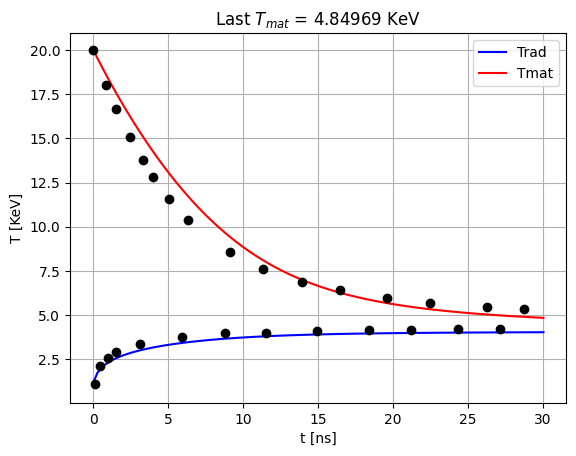

In [6]:
output_files_path = "/home/itamarg/workspace/RICH/output/Winslow_no_compton"
path_to_initial_snap = path.join(output_files_path, f"snap_{0}.h5")

snaps = [file for file in os.listdir(output_files_path) if file.endswith(".h5") and file.startswith("snap")]
print(len(snaps), snaps, sep=', ')

num_of_snaps = len(snaps)
num_cells = None
num_groups = None

with h5py.File(path_to_initial_snap) as h5_file:
    print(h5_file.keys())
    num_cells = len(np.array(h5_file["Temperature"]))
    num_groups = len([key for key in h5_file.keys() if "Eg" in key])

assert num_cells == 1

print("num_cells: ", num_cells)
print("num_groups: ", num_groups)

speed_of_light = 2.99792458e10
stefan_boltzman = 5.670374e-5
radiation_constant = 4 * stefan_boltzman / speed_of_light
boltzmann_constant = 1.380649e-16

ev = 1.602176634e-12
kev = 1e3*ev

kev_to_kelvin = kev / boltzmann_constant

Erad = np.ndarray(shape=num_of_snaps)
Trad = np.ndarray(shape=num_of_snaps)
Tmat = np.ndarray(shape=num_of_snaps)
time = np.ndarray(shape=num_of_snaps)

for i in range(num_of_snaps):
    path_to_snap =  path.join(output_files_path, snaps[i])
    with h5py.File(path_to_snap) as h5_file:
        Tmat[i] = h5_file["Temperature"][0]
        Erad[i] = h5_file["Erad"][0]
        Trad[i] = (Erad[i] / radiation_constant)**0.25
        time[i] = h5_file["Time"][0]

plt.plot(time/1e-9, Trad/kev_to_kelvin, '-b', label="Trad")
plt.plot(time/1e-9, Tmat/kev_to_kelvin, '-r', label="Tmat")
plt.grid()
plt.xlabel("t [ns]")
plt.ylabel("T [KeV]")
plt.legend(loc="best")
plt.title(f"Last $T_{{mat}}$ = {Tmat[-1]/kev_to_kelvin:g} KeV")
Trad_sample = np.loadtxt(path.join("../../CMMC/data", "Till_winslow_Trad_no_compton.txt"), delimiter=",")
Tmat_sample = np.loadtxt(path.join("../../CMMC/data", "Till_winslow_Tmat_no_compton.txt"), delimiter=",")
# Trad_sample_winslow = np.loadtxt(path.join("../../CMMC/data", "Winslow_Trad.txt"), delimiter=",")
# Tmat_sample_winslow = np.loadtxt(path.join("../../CMMC/data", "Winslow_Tmat.txt"), delimiter=",")
plt.plot(Trad_sample[:,0]/1e-9, Trad_sample[:,1], "o", c='k', label="Till Trad")
plt.plot(Tmat_sample[:,0]/1e-9, Tmat_sample[:,1], "o", c='k', label="Till Tmat")
# plt.plot(Tmat_sample_winslow[:,0]/1e-9, Tmat_sample_winslow[:,1], "+", c='g', label="Winslow Tmat")
# plt.plot(Trad_sample_winslow[:,0]/1e-9, Trad_sample_winslow[:,1], "+", c='g', label="Winslow Trad")
# plt.xscale("symlog")
plt.show()
plt.close()

130, ['snap_0.h5', 'snap_1.h5', 'snap_2.h5', 'snap_3.h5', 'snap_4.h5', 'snap_5.h5', 'snap_6.h5', 'snap_7.h5', 'snap_8.h5', 'snap_9.h5', 'snap_10.h5', 'snap_11.h5', 'snap_12.h5', 'snap_13.h5', 'snap_14.h5', 'snap_15.h5', 'snap_16.h5', 'snap_17.h5', 'snap_18.h5', 'snap_19.h5', 'snap_20.h5', 'snap_21.h5', 'snap_22.h5', 'snap_23.h5', 'snap_24.h5', 'snap_25.h5', 'snap_26.h5', 'snap_27.h5', 'snap_28.h5', 'snap_29.h5', 'snap_30.h5', 'snap_31.h5', 'snap_32.h5', 'snap_33.h5', 'snap_34.h5', 'snap_35.h5', 'snap_36.h5', 'snap_37.h5', 'snap_38.h5', 'snap_39.h5', 'snap_40.h5', 'snap_41.h5', 'snap_42.h5', 'snap_43.h5', 'snap_44.h5', 'snap_45.h5', 'snap_46.h5', 'snap_47.h5', 'snap_48.h5', 'snap_49.h5', 'snap_50.h5', 'snap_51.h5', 'snap_52.h5', 'snap_53.h5', 'snap_54.h5', 'snap_55.h5', 'snap_56.h5', 'snap_57.h5', 'snap_58.h5', 'snap_59.h5', 'snap_60.h5', 'snap_61.h5', 'snap_62.h5', 'snap_63.h5', 'snap_64.h5', 'snap_65.h5', 'snap_66.h5', 'snap_67.h5', 'snap_68.h5', 'snap_69.h5', 'snap_70.h5', 'snap_71.h

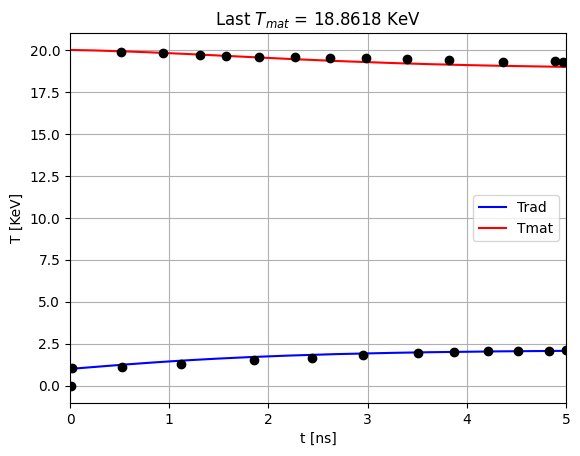

In [13]:
output_files_path = "/home/itamarg/workspace/RICH/output/Winslow_only_compton"
path_to_initial_snap = path.join(output_files_path, f"snap_{0}.h5")

snaps = [file for file in os.listdir(output_files_path) if file.endswith(".h5") and file.startswith("snap")]
print(len(snaps), snaps, sep=', ')

num_of_snaps = len(snaps)
num_cells = None
num_groups = None

with h5py.File(path_to_initial_snap) as h5_file:
    print(h5_file.keys())
    num_cells = len(np.array(h5_file["Temperature"]))
    num_groups = len([key for key in h5_file.keys() if "Eg" in key])

assert num_cells == 1

print("num_cells: ", num_cells)
print("num_groups: ", num_groups)

speed_of_light = 2.99792458e10
stefan_boltzman = 5.670374e-5
radiation_constant = 4 * stefan_boltzman / speed_of_light
boltzmann_constant = 1.380649e-16

ev = 1.602176634e-12
kev = 1e3*ev

kev_to_kelvin = kev / boltzmann_constant

Erad = np.ndarray(shape=num_of_snaps)
Trad = np.ndarray(shape=num_of_snaps)
Tmat = np.ndarray(shape=num_of_snaps)
time = np.ndarray(shape=num_of_snaps)

for i in range(num_of_snaps):
    path_to_snap =  path.join(output_files_path, snaps[i])
    with h5py.File(path_to_snap) as h5_file:
        Tmat[i] = h5_file["Temperature"][0]
        Erad[i] = h5_file["Erad"][0]
        Trad[i] = (Erad[i] / radiation_constant)**0.25
        time[i] = h5_file["Time"][0]

plt.plot(time/1e-9, Trad/kev_to_kelvin, '-b', label="Trad")
plt.plot(time/1e-9, Tmat/kev_to_kelvin, '-r', label="Tmat")
plt.grid()
plt.xlabel("t [ns]")
plt.ylabel("T [KeV]")
plt.legend(loc="best")
plt.title(f"Last $T_{{mat}}$ = {Tmat[-1]/kev_to_kelvin:g} KeV")
Trad_sample = np.loadtxt(path.join("../../CMMC/data", "Winslow_Trad_only_compton.txt"), delimiter=",")
Tmat_sample = np.loadtxt(path.join("../../CMMC/data", "Winslow_Tmat_only_compton.txt"), delimiter=",")
# Trad_sample_winslow = np.loadtxt(path.join("../../CMMC/data", "Winslow_Trad.txt"), delimiter=",")
# Tmat_sample_winslow = np.loadtxt(path.join("../../CMMC/data", "Winslow_Tmat.txt"), delimiter=",")
plt.plot(Trad_sample[:,0]/1e-9, Trad_sample[:,1], "o", c='k', label="Till Trad")
plt.plot(Tmat_sample[:,0]/1e-9, Tmat_sample[:,1], "o", c='k', label="Till Tmat")
# plt.plot(Tmat_sample_winslow[:,0]/1e-9, Tmat_sample_winslow[:,1], "+", c='g', label="Winslow Tmat")
# plt.plot(Trad_sample_winslow[:,0]/1e-9, Trad_sample_winslow[:,1], "+", c='g', label="Winslow Trad")
# plt.xscale("symlog")
plt.xlim(0., 5)
plt.show()
plt.close()

130, ['snap_0.h5', 'snap_1.h5', 'snap_2.h5', 'snap_3.h5', 'snap_4.h5', 'snap_5.h5', 'snap_6.h5', 'snap_7.h5', 'snap_8.h5', 'snap_9.h5', 'snap_10.h5', 'snap_11.h5', 'snap_12.h5', 'snap_13.h5', 'snap_14.h5', 'snap_15.h5', 'snap_16.h5', 'snap_17.h5', 'snap_18.h5', 'snap_19.h5', 'snap_20.h5', 'snap_21.h5', 'snap_22.h5', 'snap_23.h5', 'snap_24.h5', 'snap_25.h5', 'snap_26.h5', 'snap_27.h5', 'snap_28.h5', 'snap_29.h5', 'snap_30.h5', 'snap_31.h5', 'snap_32.h5', 'snap_33.h5', 'snap_34.h5', 'snap_35.h5', 'snap_36.h5', 'snap_37.h5', 'snap_38.h5', 'snap_39.h5', 'snap_40.h5', 'snap_41.h5', 'snap_42.h5', 'snap_43.h5', 'snap_44.h5', 'snap_45.h5', 'snap_46.h5', 'snap_47.h5', 'snap_48.h5', 'snap_49.h5', 'snap_50.h5', 'snap_51.h5', 'snap_52.h5', 'snap_53.h5', 'snap_54.h5', 'snap_55.h5', 'snap_56.h5', 'snap_57.h5', 'snap_58.h5', 'snap_59.h5', 'snap_60.h5', 'snap_61.h5', 'snap_62.h5', 'snap_63.h5', 'snap_64.h5', 'snap_65.h5', 'snap_66.h5', 'snap_67.h5', 'snap_68.h5', 'snap_69.h5', 'snap_70.h5', 'snap_71.h

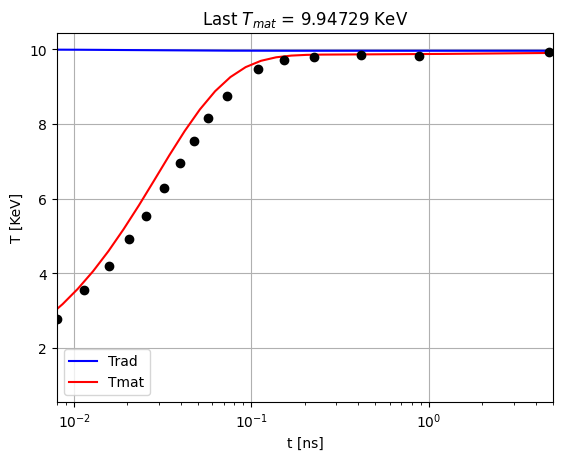

In [10]:
output_files_path = "/home/itamarg/workspace/RICH/output/Till"
path_to_initial_snap = path.join(output_files_path, f"snap_{0}.h5")

snaps = [file for file in os.listdir(output_files_path) if file.endswith(".h5") and file.startswith("snap")]
print(len(snaps), snaps, sep=', ')

num_of_snaps = len(snaps)
num_cells = None
num_groups = None

with h5py.File(path_to_initial_snap) as h5_file:
    print(h5_file.keys())
    num_cells = len(np.array(h5_file["Temperature"]))
    num_groups = len([key for key in h5_file.keys() if "Eg" in key])

assert num_cells == 1

print("num_cells: ", num_cells)
print("num_groups: ", num_groups)

speed_of_light = 2.99792458e10
stefan_boltzman = 5.670374e-5
radiation_constant = 4 * stefan_boltzman / speed_of_light
boltzmann_constant = 1.380649e-16

ev = 1.602176634e-12
kev = 1e3*ev

kev_to_kelvin = kev / boltzmann_constant

Erad = np.ndarray(shape=num_of_snaps)
Trad = np.ndarray(shape=num_of_snaps)
Tmat = np.ndarray(shape=num_of_snaps)
time = np.ndarray(shape=num_of_snaps)

for i in range(num_of_snaps):
    path_to_snap =  path.join(output_files_path, snaps[i])
    with h5py.File(path_to_snap) as h5_file:
        Tmat[i] = h5_file["Temperature"][0]
        Erad[i] = h5_file["Erad"][0]
        Trad[i] = (Erad[i] / radiation_constant)**0.25
        time[i] = h5_file["Time"][0]

plt.plot(time/1e-9, Trad/kev_to_kelvin, '-b', label="Trad")
plt.plot(time/1e-9, Tmat/kev_to_kelvin, '-r', label="Tmat")
plt.grid()
plt.xlabel("t [ns]")
plt.ylabel("T [KeV]")
plt.legend(loc="best")
plt.title(f"Last $T_{{mat}}$ = {Tmat[-1]/kev_to_kelvin:g} KeV")
# Trad_sample = np.loadtxt(path.join("../../CMMC/data", "Winslow_Trad_only_compton.txt"), delimiter=",")
Tmat_sample = np.loadtxt(path.join("../../CMMC/data", "Till_Tmat.txt"), delimiter=",")
# Trad_sample_winslow = np.loadtxt(path.join("../../CMMC/data", "Winslow_Trad.txt"), delimiter=",")
# Tmat_sample_winslow = np.loadtxt(path.join("../../CMMC/data", "Winslow_Tmat.txt"), delimiter=",")
# plt.plot(Trad_sample[:,0]/1e-9, Trad_sample[:,1], "o", c='k', label="Till Trad")
plt.plot(Tmat_sample[:,0]/1e-9, Tmat_sample[:,1], "o", c='k', label="Till Tmat")
# plt.plot(Tmat_sample_winslow[:,0]/1e-9, Tmat_sample_winslow[:,1], "+", c='g', label="Winslow Tmat")
# plt.plot(Trad_sample_winslow[:,0]/1e-9, Trad_sample_winslow[:,1], "+", c='g', label="Winslow Trad")
plt.xscale("log")
plt.xlim(8e-3, 5)
plt.show()
plt.close()